In [10]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [18]:
train_file = pd.read_csv('C:/Users/hp/anaconda3/train.csv')
test_file = pd.read_csv('C:/Users/hp/anaconda3/test.csv')

In [19]:
train_file.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
test_file.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
np.sort(train_file.label.unique())

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [23]:
num_train,num_validation = int(len(train_file)*0.8),int(len(train_file)*0.2)

In [24]:
num_train,num_validation

(33600, 8400)

In [25]:
x_train,y_train = train_file.iloc[:num_train,1:].values,train_file.iloc[:num_train,0].values

In [26]:
x_validation,y_validation=train_file.iloc[num_train:,1:].values,train_file.iloc[num_train:,0].values

In [27]:
print(x_train.shape)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)

(33600, 784)
(33600,)
(8400, 784)
(8400,)


Label: 4


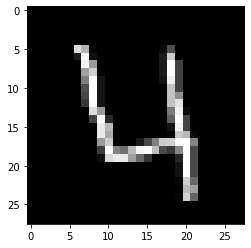

In [28]:
index=3
print("Label: " + str(y_train[index]))
plt.imshow(x_train[index].reshape((28,28)),cmap='gray')
plt.show()

In [29]:
clf=RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

#predict value of label using classifier

In [30]:
prediction_validation = clf.predict(x_validation)

In [31]:
print("Validation Accuracy: " + str(accuracy_score(y_validation,prediction_validation)))

Validation Accuracy: 0.9652380952380952


In [32]:
print("Validation Confusion Matrix: \n" + str(confusion_matrix(y_validation,prediction_validation)))

Validation Confusion Matrix: 
[[842   0   1   0   0   0   4   0   5   0]
 [  0 937   2   3   2   2   0   1   3   0]
 [  4   0 774   3   3   2   2   6   6   1]
 [  3   1  21 829   0   9   1   5  11   2]
 [  1   2   2   0 779   0   7   0   4  16]
 [  2   0   0  12   1 719   6   0   6   1]
 [  4   2   1   0   3   5 816   0   0   0]
 [  0   2   6   2   2   0   0 858   2  12]
 [  1   9   2   3   3   6   4   1 765   8]
 [  6   4   4  10   9   3   0   9   6 789]]


Predicted 0 as 6


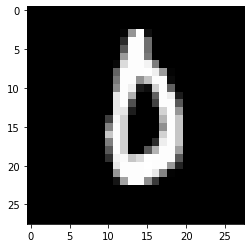

In [33]:
#wrong_predictions
index=3
print("Predicted " + str(y_validation[y_validation!=prediction_validation][index]) + " as " + 
     str(prediction_validation[y_validation!=prediction_validation][index]))
plt.imshow(x_validation[y_validation!=prediction_validation][index].reshape((28,28)),cmap='gray')

In [34]:
x_test=test_file

In [35]:
prediction_test = clf.predict(x_test)

C:\Users\hp\anaconda3\envs\tensorflow\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Predicted 7


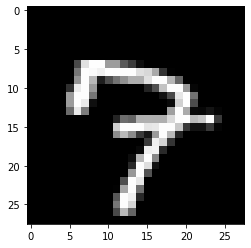

In [36]:
#predictions_for_testdata
index=5
print("Predicted " + str(prediction_test[index]))
plt.imshow(x_test.iloc[index].values.reshape((28,28)),cmap='gray')